In [34]:
!pip install tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm
import gc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [14]:
paths = sorted(glob('./Names_2/*.txt'))
li_df = []
# for path in paths:
for path in tqdm(paths):
    df = pd.read_csv(path, names=['name', 'gender', 'occurence'])
    df['year'] = path[-8:-4]
    li_df.append(df)

df = pd.concat(li_df, ignore_index=True)
del li_df
gc.collect()

100%|██████████| 139/139 [00:01<00:00, 112.86it/s]


60

In [15]:
df = df.set_index('year').reset_index()
gc.collect()

22

In [16]:
df.head(2)

,year,name,gender,occurence
0,1880,Mary,F,7065
1,1880,Anna,F,2604


#### Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

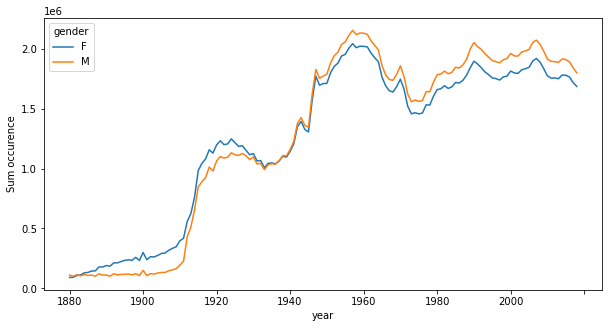

In [27]:
df.groupby(['gender', 'year']).sum().reset_index(). \
pivot(index='year', columns='gender', values='occurence'). \
plot(figsize=(10, 5), ylabel='Sum occurence');

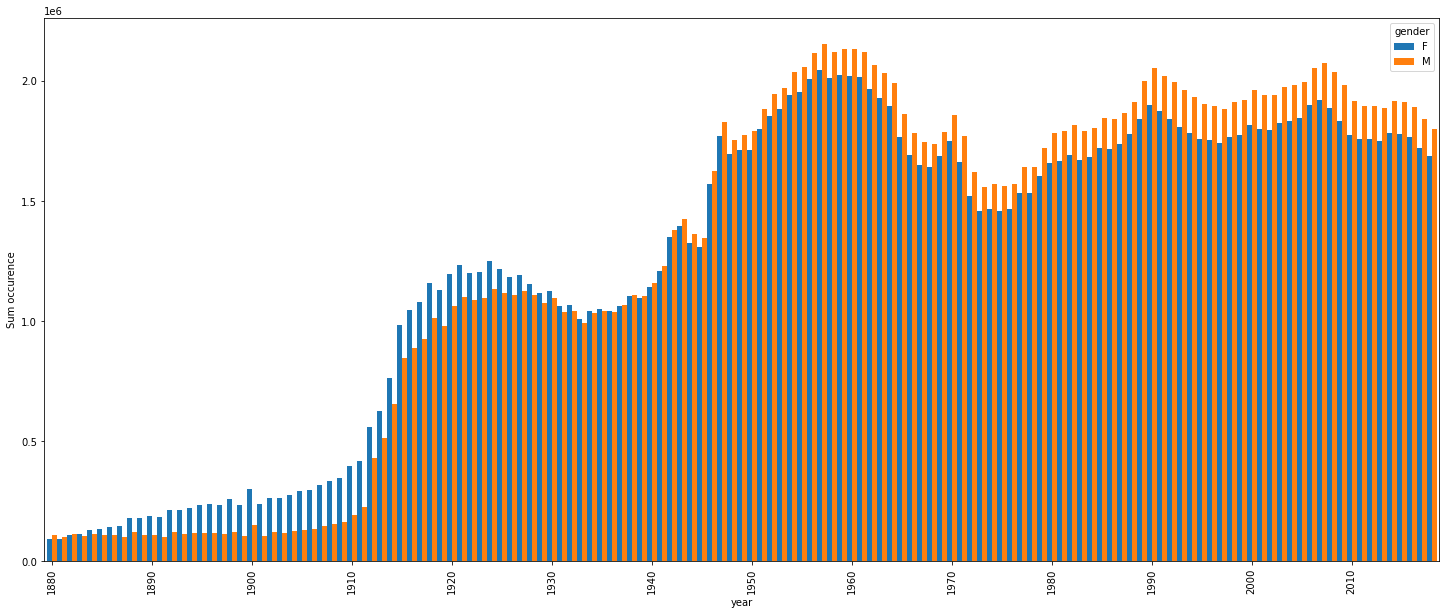

In [33]:
ax = df.groupby(['gender', 'year']).sum().reset_index(). \
    pivot(index='year', columns='gender', values='occurence'). \
    plot(kind='bar', figsize=(25, 10), ylabel='Sum occurence', width=1)
ax.xaxis.set_major_locator(MultipleLocator(10));
# ax.yaxis.set_minor_locator(MultipleLocator(5));

#### Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [49]:
# data_name=df.set_index('name')
# data_name.groupby(['year', 'gender']).occurence.nlargest(1000)

df.groupby(['year','gender']).apply(lambda x : x.nlargest(1000, 'occurence', keep='all'))[['name', 'occurence']].\
droplevel(2)

name  occurence
year gender                      
1880 F            Mary       7065
     F            Anna       2604
     F            Emma       2003
     F       Elizabeth       1939
     F          Minnie       1746
...                ...        ...
2018 M          Korbyn        207
     M         Randall        207
     M          Benton        206
     M         Coleman        206
     M          Markus        206

[281378 rows x 2 columns]

#### Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

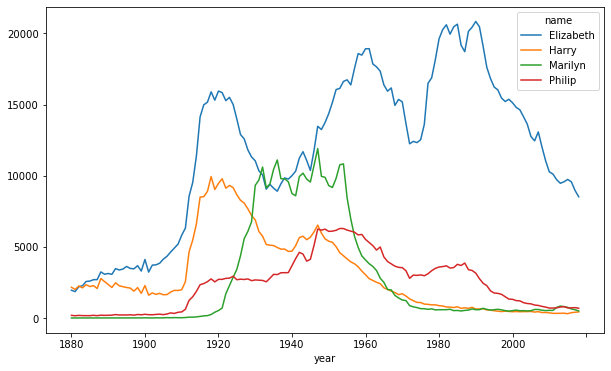

In [57]:
names = ["Philip", "Harry", "Elizabeth", "Marilyn"]
df.query("name in @names").groupby(['year', 'name']).sum().reset_index(). \
pivot(index='year', columns='name', values='occurence').fillna(0).plot(figsize=(10, 6));

#### Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [68]:
top_1000 = df.groupby(['year','gender']).apply(lambda x : x.nlargest(1000, 'occurence', keep='all'))[['name', 'occurence']].droplevel(2). \
reset_index().groupby(['year', 'gender']).occurence.sum()

all_df = df.groupby(['year', 'gender']).occurence.sum()

In [74]:
top_1000

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1584754
2017  F         1274098
      M         1536814
2018  F         1251608
      M         1493831
Name: occurence, Length: 278, dtype: int64

In [75]:
all_df

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: occurence, Length: 278, dtype: int64

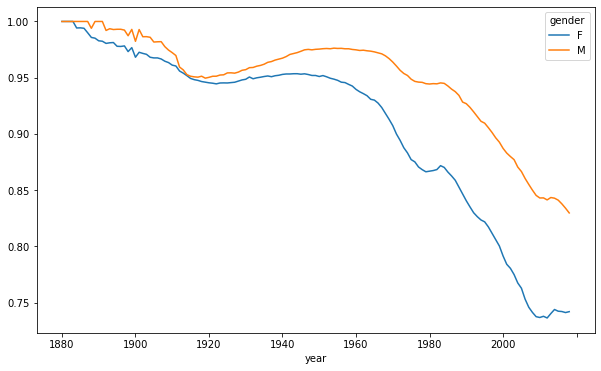

In [72]:
(top_1000 / all_df).to_frame().reset_index().pivot(index='year', columns='gender', values='occurence').plot(figsize=(10, 6));

#### Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [89]:
years = ['1900', '1960', '2018']
df_3_years = df.query('year in @years')
df_3_years['first_letter'] = df_3_years.name.apply(lambda x : x[0])

/Users/anaconda3/envs/nmtruong/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


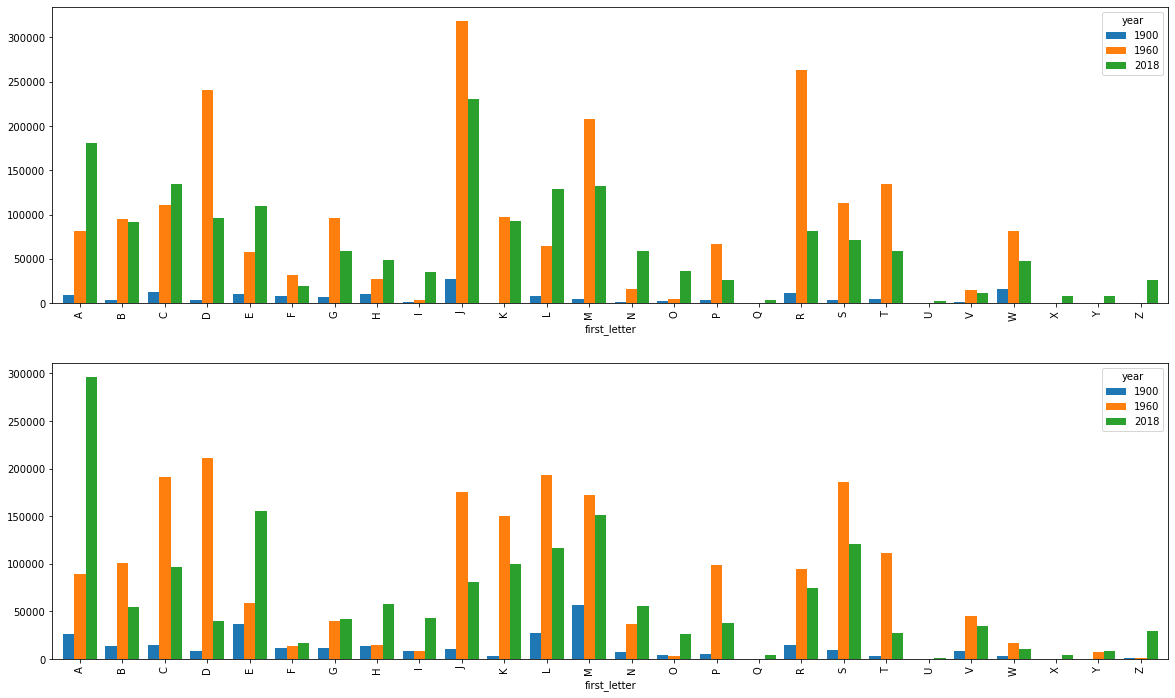

In [92]:
gender_df = df_3_years.groupby(['year', 'gender', 'first_letter']).occurence.sum().to_frame().reset_index()
male_df = gender_df.query("gender == 'M'")
female_df = gender_df.query("gender == 'F'")

fig, ax = plt.subplots(2, 1, figsize=(20, 12))
male_df.pivot(index='first_letter', columns='year', values='occurence').plot(kind='bar', ax=ax[0], width=0.8)
female_df.pivot(index='first_letter', columns='year', values='occurence').plot(kind='bar', ax=ax[1], width=0.8);

#### Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl...” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [93]:
male_df = df.query("gender == 'M'")
female_df = df.query("gender == 'F'")

male_to_female = male_df.query("name in @female_df.name")
female_to_male = female_df.query("name in @male_df.name")

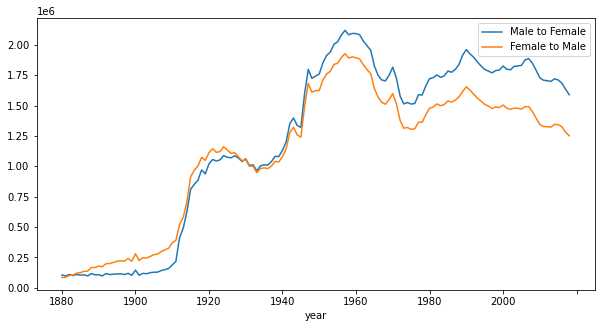

In [101]:
male_to_female.groupby('year').occurence.sum().plot(figsize=(10, 5), label='Male to Female')
female_to_male.groupby('year').occurence.sum().plot(label='Female to Male')
plt.legend();

### Ex 2

- Tung xúc sắc 100 lần --> xác suất thằng thấp hơn.
- Được phép đi lên 100 lần --> 200 lần --> xác suất thắng cao
 + 59: - 59 tầng: tung lần 1 -2, bị xuống. 30 --> 59: 
 + 59: đi xuống, 100

In [3]:
import numpy as np

In [10]:
def is_win(prob=True):
    
    floor = 0
    num_up = 0
    
    if prob:  # Tung xuc sac 100
        
        for _ in range(100):
        
            if np.random.uniform() < 0.001:
                floor = 0

            dice = np.random.randint(1, 7)

            if dice <= 2:
                floor = max(0, floor - 1)
            elif 2 < dice <= 5:
                floor += 1
            else:
                floor += np.random.randint(1, 7)
                
    else:  # Di len 100 lan
        
        while num_up < 100 and floor < 60:

            if np.random.uniform() < 0.001:
                floor = 0

            dice = np.random.randint(1, 7)

            if dice <= 2:
                floor = max(0, floor - 1)
            elif 2 < dice <= 5:
                floor += 1
                num_up += 1
            else:
                floor += np.random.randint(1, 7)
                num_up += 1

    return floor >= 60

In [11]:
num_plays = 10000
results = []
for _ in range(num_plays):
    results.append(is_win(prob=False))
    
sum(results) / num_plays

0.9834

In [12]:
num_plays = 10000
results = []
for _ in range(num_plays):
    results.append(is_win(prob=True))
    
sum(results) / num_plays

0.7823